# Class exercises

Simulation and Resampling

- MARCOS ÁLVAREZ MARTÍN
- SIMON SCHMETZ

## Bernoulli Model
A Bernoulli distribution is a simple probability distribution that models a binary outcome (success/failure, yes/no, heads/tails). If a random variable $X_i$ follows a Bernoulli distribution with probability $\mathcal{p}$, we write:

$$X_i \sim Bernoulli(\mathcal{p}) = Binomial(1, \mathcal{p})$$

This means: 
- $X_{i}=1$ (sucess) with probability $\mathcal{p}$
- $X_{i}=0$ (failure) with probability $1-\mathcal{p}$



## Explanation
We are given a sequence of independent Bernoulli r.v:
$$X_1,X_2,X_3,\ldots \sim Bernoulli(\mathcal{p})$$

Defining the sample proportion:
$$\mathcal{p}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$$
This is the proportion of successes in the first $\mathcal{n}$ trials.

- Mean($\mu$) of a Bernoulli($\mathcal{p}$) variable:

    The expected value of each $X_i$ is: 
    $$E[X_i]= \mathcal{p}$$
    So the theoretical mean of the sequence is $\mathcal{p}$

- Convergence of  $p_n$  to $ p $):

    The Law of Large Numbers (LLN) states that as $\mathcal{n}$ tends to $\infty$, the sample mean  $p_n$ converges to the true probability $ p $:

$$
p_n \to p \quad \text{(almost surely or in probability)}
$$

## R code

## To Python:

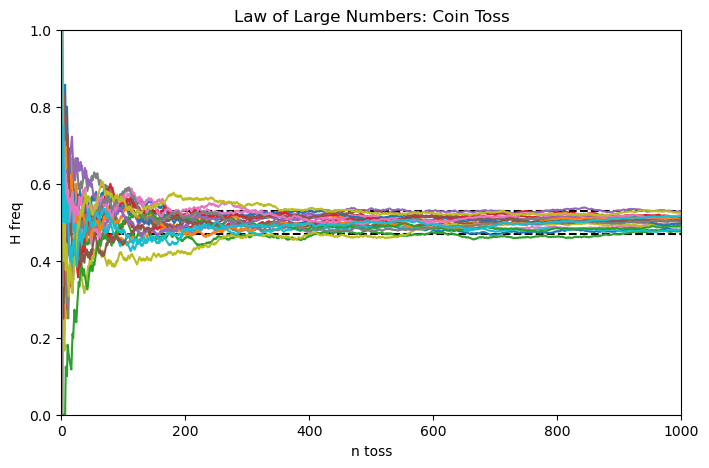

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Create an empty plot with the specified x and y axis labels
plt.figure(figsize=(8, 5))
plt.xlabel("n toss")
plt.ylabel("H freq")
plt.xlim(0, 1000)
plt.ylim(0, 1)

# Draw horizontal reference lines at y = 0.53 and y = 0.47
plt.axhline(y=0.53, color='black', linestyle='dashed')
plt.axhline(y=0.47, color='black', linestyle='dashed')

# Run 20 different experiments
for i in range(1, 21):
    np.random.seed(i)  # Set seed for reproducibility
    
    # Generate 1000 random coin flips (0 = tails, 1 = heads)
    coin_flips = np.random.choice([0, 1], size=1000, replace=True)
    
    # Compute the running proportion of heads
    running_proportion = np.cumsum(coin_flips) / np.arange(1, 1001)
    
    # Plot the running proportion as a line for each experiment
    plt.plot(running_proportion, label=f"Trial {i}")

# Display the plot
plt.title("Law of Large Numbers: Coin Toss")
plt.show()

### Interpretation:
- At the beginning (low number of tosses), the proportion of heads fluctuates significantly because randomness dominates.
- As the number of tosses increases, the lines converge toward 0.5, the expected probability of heads in a fair coin toss.
- This illustrates the Law of Large Numbers (LLN), which states that as the number of trials increases, the sample mean (observed frequency) will approach the theoretical probability.

### Conclusion:
This plot visually confirms that with enough trials, the empirical probability of heads in a fair coin toss stabilizes around 0.5, supporting the Law of Large Numbers.

## Ilustration of the CLT in R

## Introduction

The Central Limit Theorem (CLT) states that, regardless of the original distribution of a population, the distribution of the sample means will tend to be normal if the sample size is sufficiently large. This is true even if the population distribution is not normal.

## Key Aspects of the CLT
- As the sample size n increases, the sampling distribution of the mean approaches a normal distribution.
- The mean of the sampling distribution is equal to the population mean:  
  $$
  \mu_{\bar{X}} = \mu
  $$
- The standard deviation of the sampling distribution (standard error) is:  
  $$
  \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
  $$

## Example: Binomial Approximation by Normal Distribution

A binomial distribution B(n, p) can be approximated by a normal distribution N(μ, σ²) when $ n $ is large, where:
- $ \mu = np $
- $ \sigma^2 = np(1-p) $

This approximation works well for large $ n $, especially when $ np $ and $ n(1-p) $ are both greater than 5.

## Practical Implication
The CLT allows us to use normal probability models for many statistical applications, such as hypothesis testing and confidence intervals, even when the original data is not normally distributed.

## R Code:

## Code in Python:

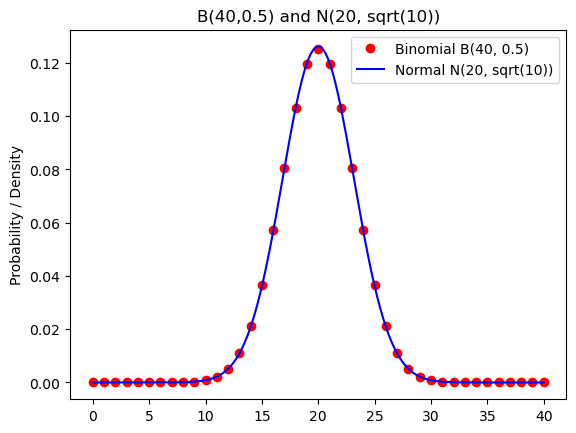

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the binomial distribution parameters
n = 40  # Number of trials
p = 0.5  # Probability of success

# Generate x values (possible outcomes of the binomial)
x = np.arange(0, n + 1)

# Compute the binomial probability mass function (PMF)
binom_pmf = stats.binom.pmf(x, n, p)

# Create a sequence from 0 to 40 with a step size of 0.01
t = np.arange(0, 40, 0.01)

# Compute the normal probability density function (PDF)
mu = n * p  # Mean of normal approximation
sigma = np.sqrt(n * p * (1 - p))  # Standard deviation
normal_pdf = stats.norm.pdf(t, mu, sigma)

# Plot the binomial distribution
plt.plot(x, binom_pmf, 'ro', label="Binomial B(40, 0.5)")

# Overlay the normal approximation
plt.plot(t, normal_pdf, 'b-', label="Normal N(20, sqrt(10))")

# Labels and title
plt.ylabel("Probability / Density")
plt.title("B(40,0.5) and N(20, sqrt(10))")
plt.legend()

# Show the plot
plt.show()


The plot shows the CLT in action, and we can see how a binomial distriution approaches normality.

## Chi-Square Goodness-of-fit
The Chi-Square Goodness of Fit Test is a statistical test used to determine whether a sample distribution differs significantly from an expected distribution. It is commonly used in categorical data analysis to check if observed frequencies align with theoretical expectations.

### Formula
The Chi-Square test statistic is given by:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:
- $O_i$ = Observed frequency of category $i$
- $E_i$ = Expected frequency of category $i$

### Hypotheses
- Null Hypothesis ($H_0$): The observed distribution follows the expected distribution.
- Alternative Hypothesis ($H_1$): The observed distribution significantly differs from the expected distribution.

### Assumptions
1. The data should be categorical.
2. The expected frequency in each category should be at least 5 for valid approximation using the Chi-Square distribution.
3. Observations should be independent.

### Python Equivalent of the Given R Code
Below is the Python implementation of the R script using `scipy.stats.chisquare` and `matplotlib.pyplot`.


Chi-Square Statistic: 2.6667
P-Value: 0.2636


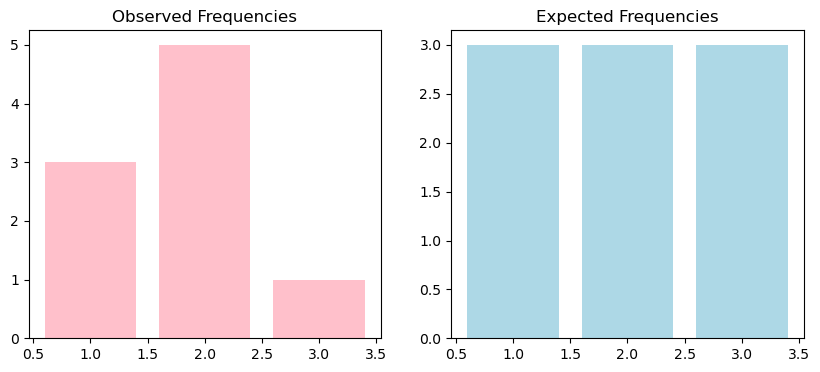

In [45]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

# Simulating observed data (similar to R's table function)
data = [3, 2, 1, 2, 2, 1, 2, 1, 2]
observed_counts = dict(Counter(data))
categories = sorted(observed_counts.keys())

# Observed frequencies
observed = np.array([observed_counts.get(cat, 0) for cat in categories])
n = observed.sum()

# Expected probabilities (equal probability for each category)
expected_probs = np.full(len(categories), 1 / len(categories))

# Performing Chi-Square Goodness of Fit Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected_probs * n)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Plot observed vs expected frequencies
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(categories, observed, color="pink")
axes[0].set_title("Observed Frequencies")

axes[1].bar(categories, expected_probs * n, color="lightblue")
axes[1].set_title("Expected Frequencies")

plt.show()


Looking to the previous outcome, we do not have enough evidence to reject the null hypothesis.

## Binary Expansion and (Pseudo) Random Number Generation

### Binary Expansion

Binary expansion is a way of representing real numbers in the $[0,1]$ interval using an infinite sequence of binary digits (0s and 1s). Each number in this interval can be expressed as:

$$
x = \sum_{i=1}^{\infty} \frac{x_i}{2^i}
$$

where $x_i$ are the binary digits (either 0 or 1). This representation is analogous to how decimal expansions work, but in base 2. 

For example, the binary number 0.101 in decimal is:

$$
0.101_2 = \frac{1}{2} + \frac{0}{4} + \frac{1}{8} = 0.625
$$

### Monte Carlo Simulation of Binary Expansion

We can generate a sequence of random binary digits (0s and 1s) and interpret them as the binary expansion of a number in the $[0,1]$ interval. By repeating this process multiple times, we obtain a set of numbers that we can compare to a uniform distribution using the Kolmogorov-Smirnov test (KS test).

Below is the Python equivalent of the R simulation.

## R Code

## R code translated to Python:

In [64]:
import numpy as np
import scipy.stats as stats

# Monte Carlo simulations
MC = 200
np.random.seed(1)  # Set seed for reproducibility
simul_bin = np.zeros(MC)

for i in range(MC):
    samp = np.random.choice([0, 1], size=100, replace=True)
    simul_bin[i] = np.sum(samp / (2.0 ** np.arange(1, 101)))  # Use float exponentiation

# Display first few values
print("First 6 simulated values:", simul_bin[:6])

# Perform Kolmogorov-Smirnov test against uniform distribution
ks_stat, p_value = stats.kstest(simul_bin, 'uniform')

# Display p-value
print(f"KS Test p-value: {p_value:.4f}")

First 6 simulated values: [0.81088665 0.8788762  0.057723   0.27133013 0.23941833 0.48158173]
KS Test p-value: 0.9682


Since the p-value is much greater than a common threshold (e.g., 0.05), we fail to reject the null hypothesis, suggesting that the simulated numbers are consistent with a uniform distribution. This confirms that the binary expansion approach correctly generates uniform random numbers in $[0,1]$.